# Loading the data

In [194]:
import pandas as pd

test = pd.read_csv('test.csv', index_col = 'PassengerId')
train = pd.read_csv('train.csv', index_col = 'PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

## 1- Inspecting the training set

In [195]:
print(train.info())
print('------------------------------')
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
------------------------------
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


## 2- Inspecting the testing set

In [196]:
print(test.info())
print('------------------------------')
print(test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None
------------------------------
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


## 3- Inspecting training columns

In [197]:
# Dislay summery of all columns
train.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


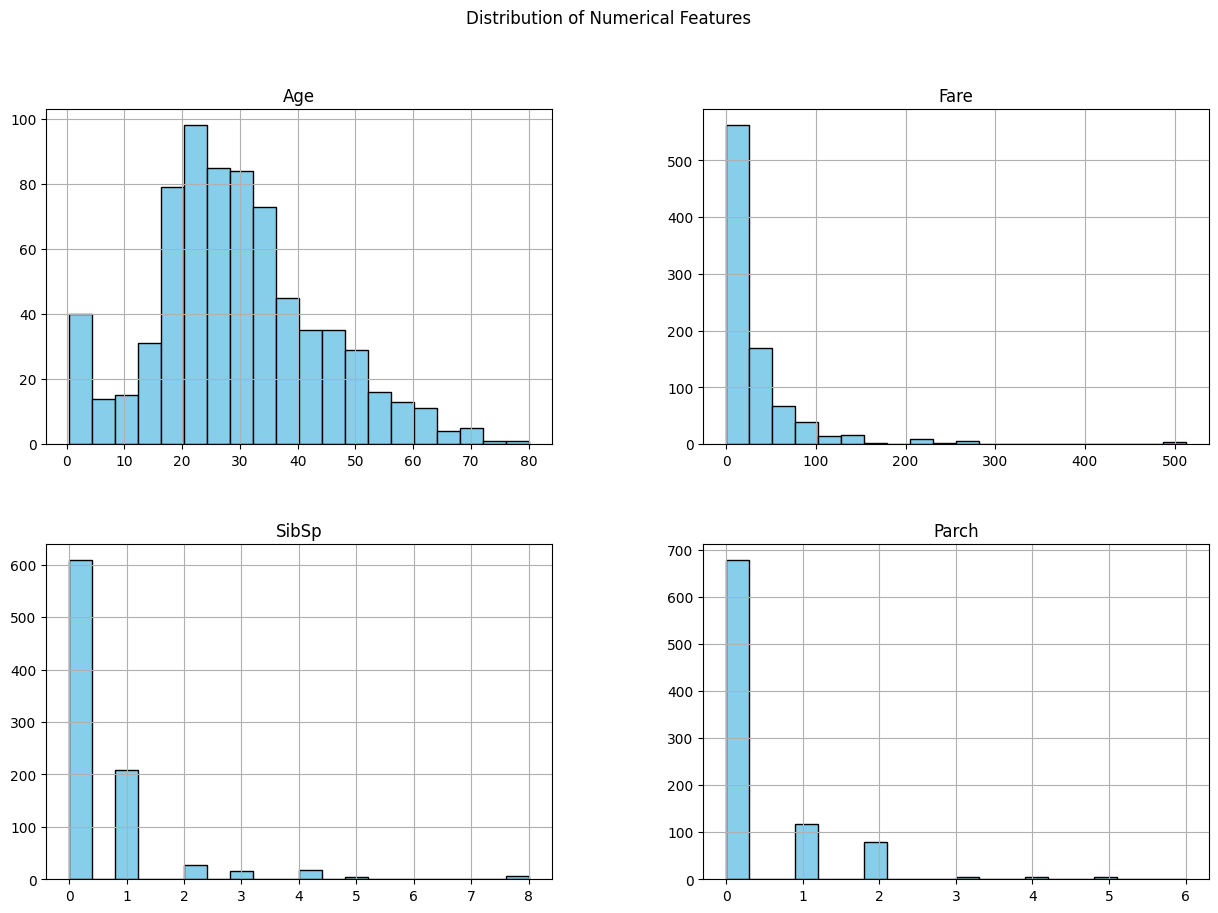

In [198]:
# Ploting the distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot histograms
train[num_cols].hist(bins=20, figsize=(15, 10), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

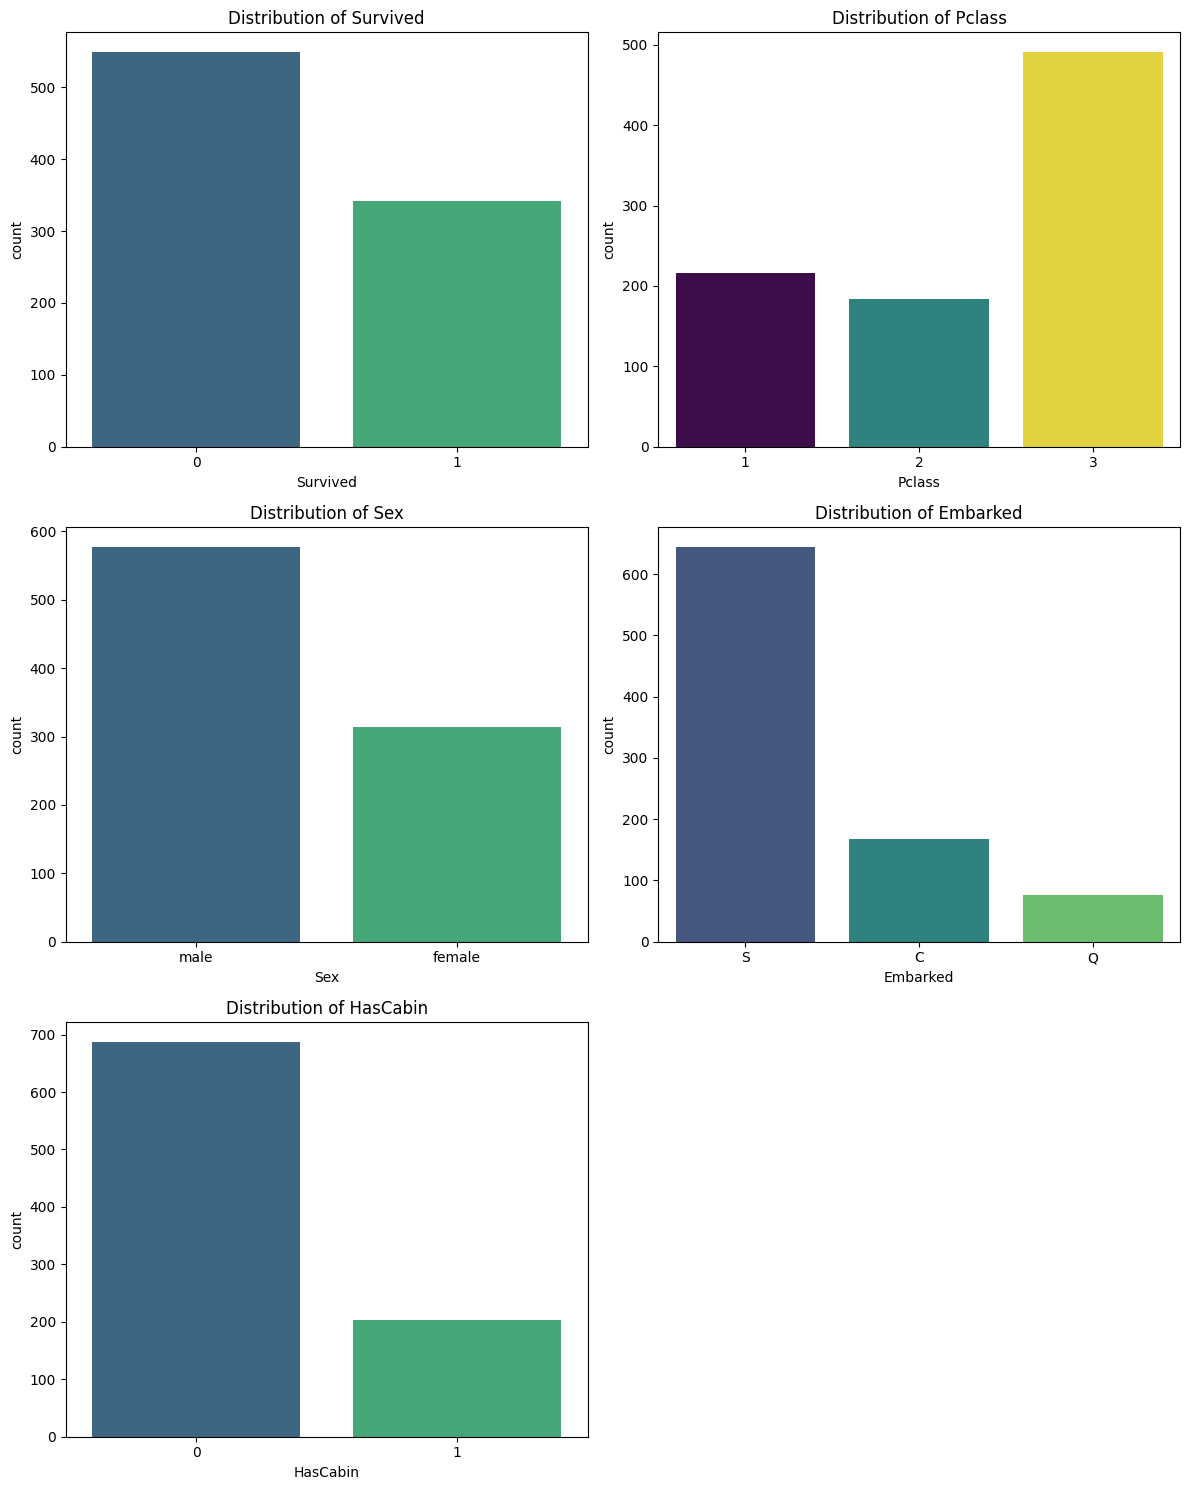

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure HasCabin is created
train['HasCabin'] = train['Cabin'].notnull().astype(int)

# 2. Define columns to plot
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'HasCabin']

# 3. Create a 3x2 grid (to accommodate 5 plots)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten() # Flatten the 2D array of axes into 1D for easy iteration

for i, col in enumerate(cat_cols):
    # Set hue=col to match the x-axis, and legend=False
    sns.countplot(x=col, data=train, ax=axes[i], palette='viridis', hue=col, legend=False)
    axes[i].set_title(f'Distribution of {col}')

# 4. Remove the unused 6th subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

From the distributions we notice:
- The Age distribution is skewed, so we will fill missing values with the median.
- The Embarked distribution is also skewed, we will also use the mode.

## 4- Inspecting testing columns

In [200]:
# Dislay summery of all columns
test.describe(include = 'all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


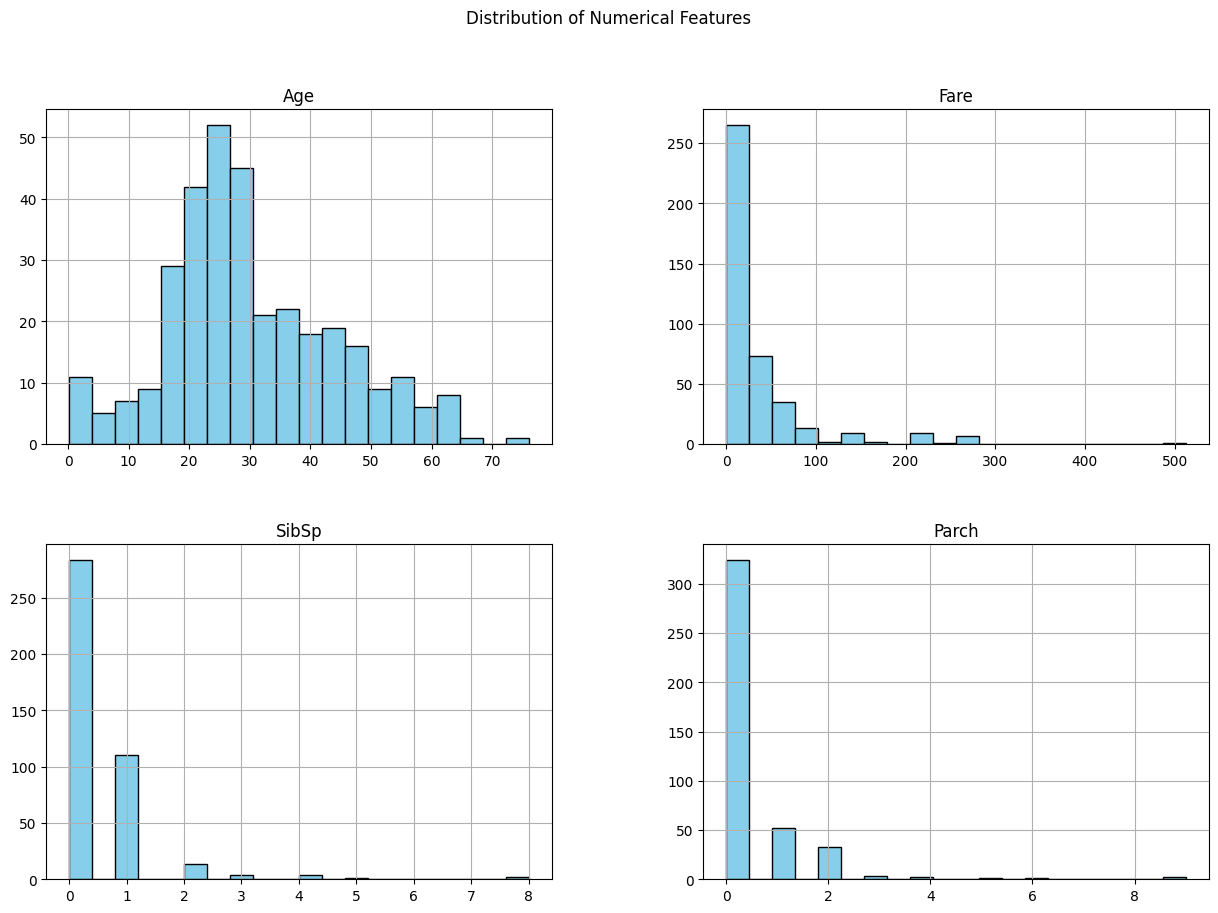

In [201]:
# Ploting the distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot histograms
test[num_cols].hist(bins=20, figsize=(15, 10), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

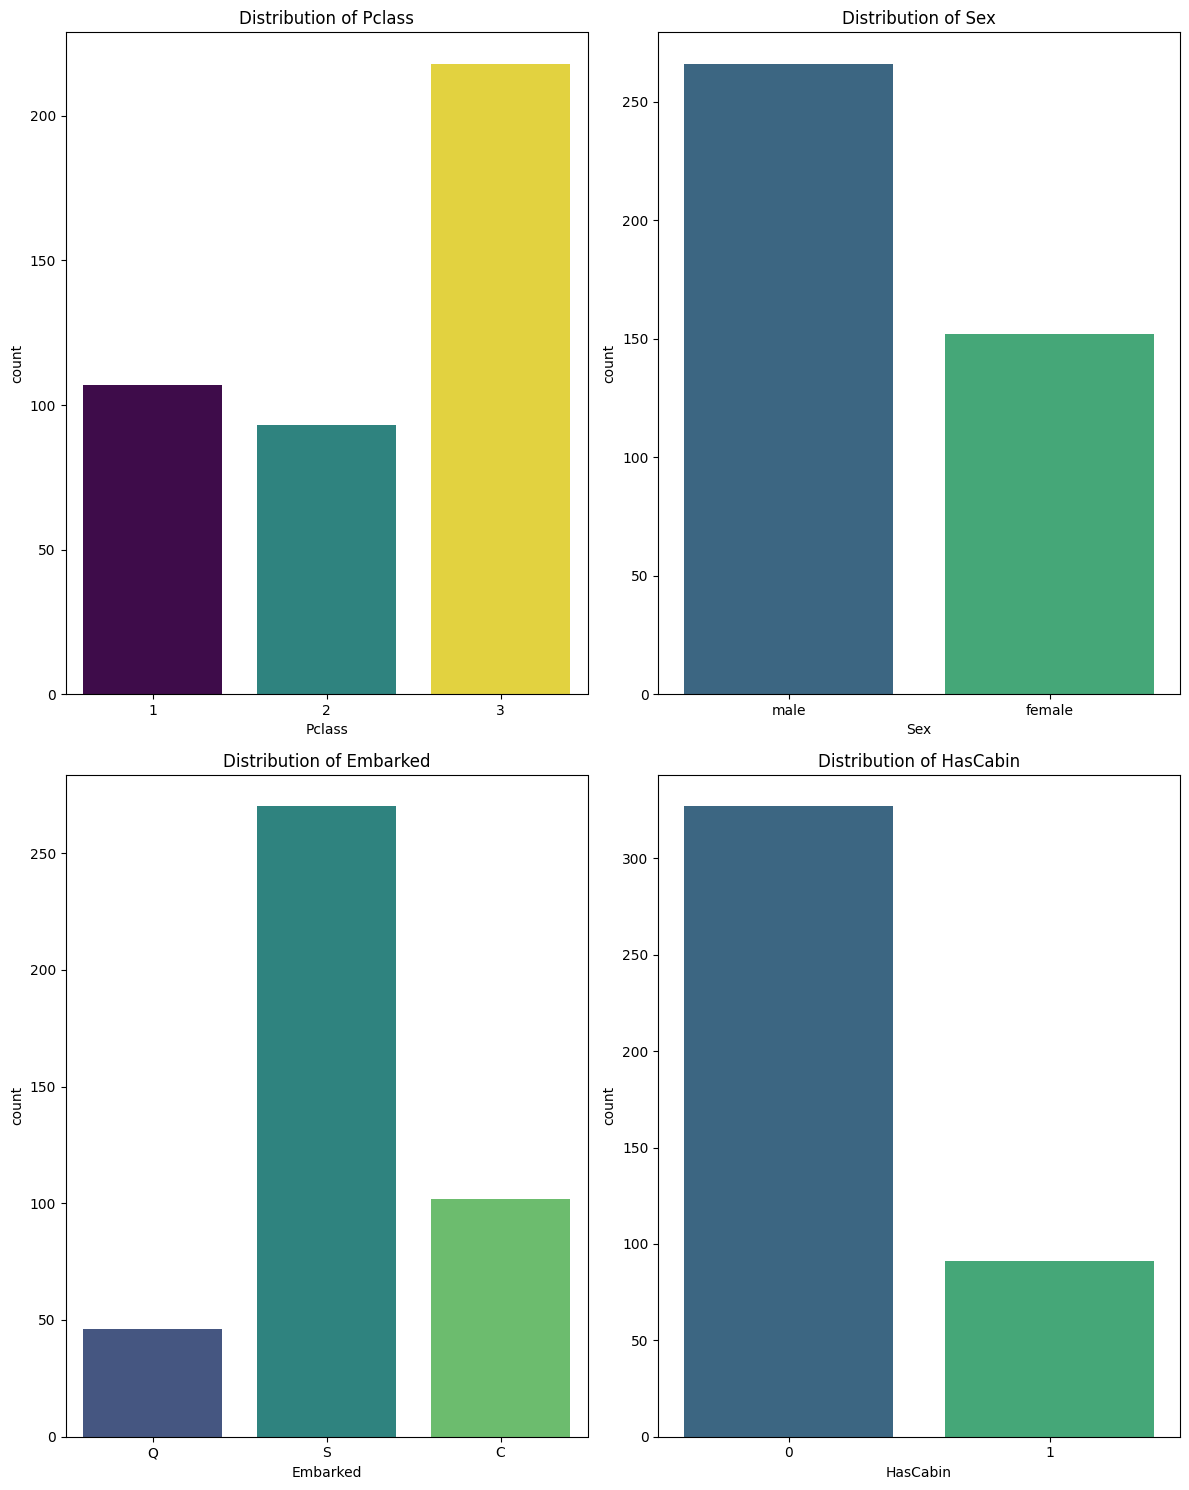

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure HasCabin is created
test['HasCabin'] = test['Cabin'].notnull().astype(int)

# 2. Define columns to plot
cat_cols = ['Pclass', 'Sex', 'Embarked', 'HasCabin']

# 3. Create a 3x2 grid (to accommodate 5 plots)
fig, axes = plt.subplots(2, 2, figsize=(12, 15))
axes = axes.flatten() # Flatten the 2D array of axes into 1D for easy iteration

for i, col in enumerate(cat_cols):
    # Set hue=col to match the x-axis, and legend=False
    sns.countplot(x=col, data=test, ax=axes[i], palette='viridis', hue=col, legend=False)
    axes[i].set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

- We will deal with the Age in the same way.
- We will fill in the Fare with the mean of the fares of people in the same class.

## 5- Handling Missing Values

In [203]:
age_median = train['Age'].median()
fare_mean_by_class = train.groupby('Pclass')['Fare'].mean()
embarked_mode = train['Embarked'].mode()[0]

# Fill the missing age with the median
train['Age'] = train['Age'].fillna(age_median)
test['Age'] = test['Age'].fillna(age_median)

# Fill the missing fare with the mean of the Pclass fare
train['Fare'] = train['Fare'].fillna(train['Pclass'].map(fare_mean_by_class))
test['Fare'] = test['Fare'].fillna(test['Pclass'].map(fare_mean_by_class))

# Fill the Embarked with the mode
train['Embarked'] = train['Embarked'].fillna(embarked_mode)
test['Embarked'] = test['Embarked'].fillna(embarked_mode)

# Drop columns that are text-heavy and non-numeric
drop_cols = ['Name', 'Ticket', 'Cabin']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

# 6- Feature Engineering

In [204]:
# Add 'familySize', 'isAlone', 'isChild' columns
test['familySize'] = test['SibSp'] + test['Parch'] + 1
test['isAlone'] = (test['familySize'] == 1).astype(int)
test['isChild'] = (test['Age'] < 14).astype(int)

train['familySize'] = train['SibSp'] + train['Parch'] + 1
train['isAlone'] = (train['familySize'] == 1).astype(int)
train['isChild'] = (train['Age'] < 14).astype(int)

## 7- Encoding categorical variables

In [205]:
# Binary mapping
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# One hot encoding
train = pd.get_dummies(train, columns=['Embarked'], prefix='Port')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Port')

# 8- Inspecting Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

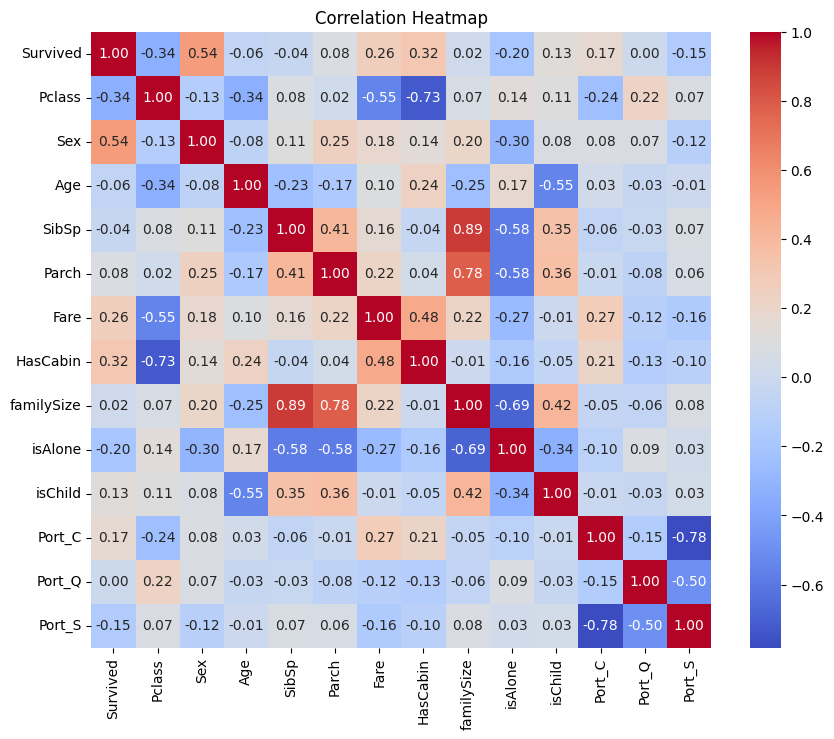

In [206]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

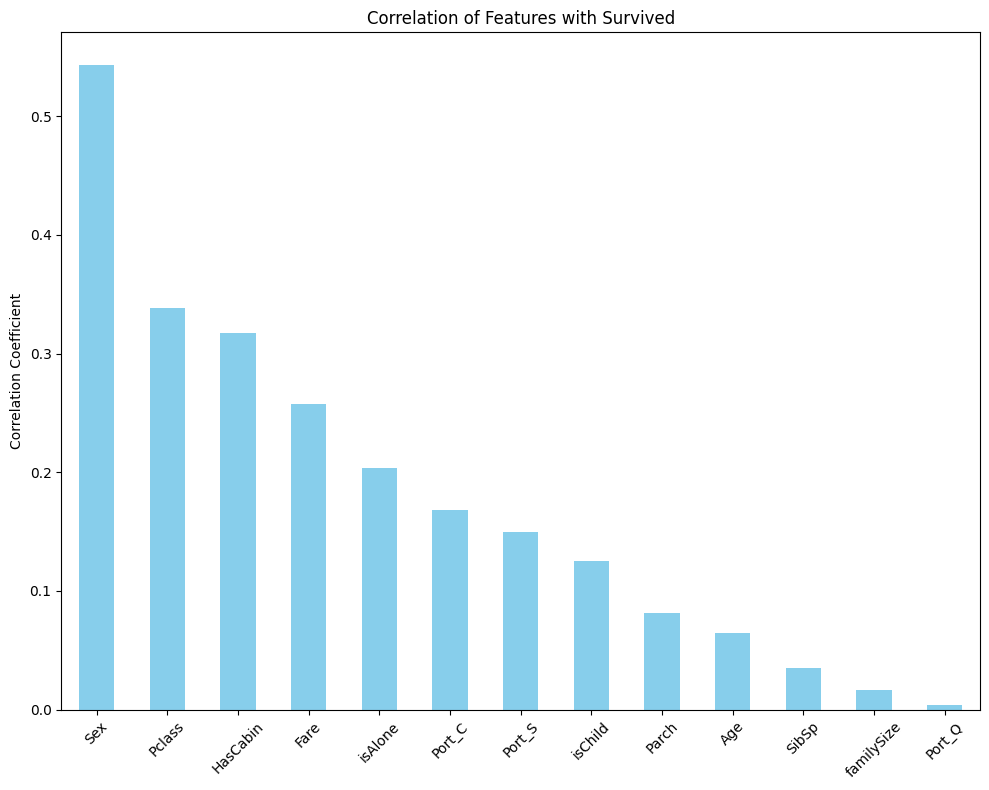

In [207]:
import matplotlib.pyplot as plt

# 1. Calculate the correlation matrix and select the 'Survived' column
# 2. Sort the values in descending order
corr_series = abs(train.corr(numeric_only=True)['Survived']).sort_values(ascending=False)

# 3. Create the plot
# We use [1:] to skip the first row (Survived correlated with itself, which is always 1.0)
plt.rcParams['figure.figsize'] = (10, 8)
corr_series[1:].plot(kind='bar', color='skyblue')

plt.title('Correlation of Features with Survived')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()

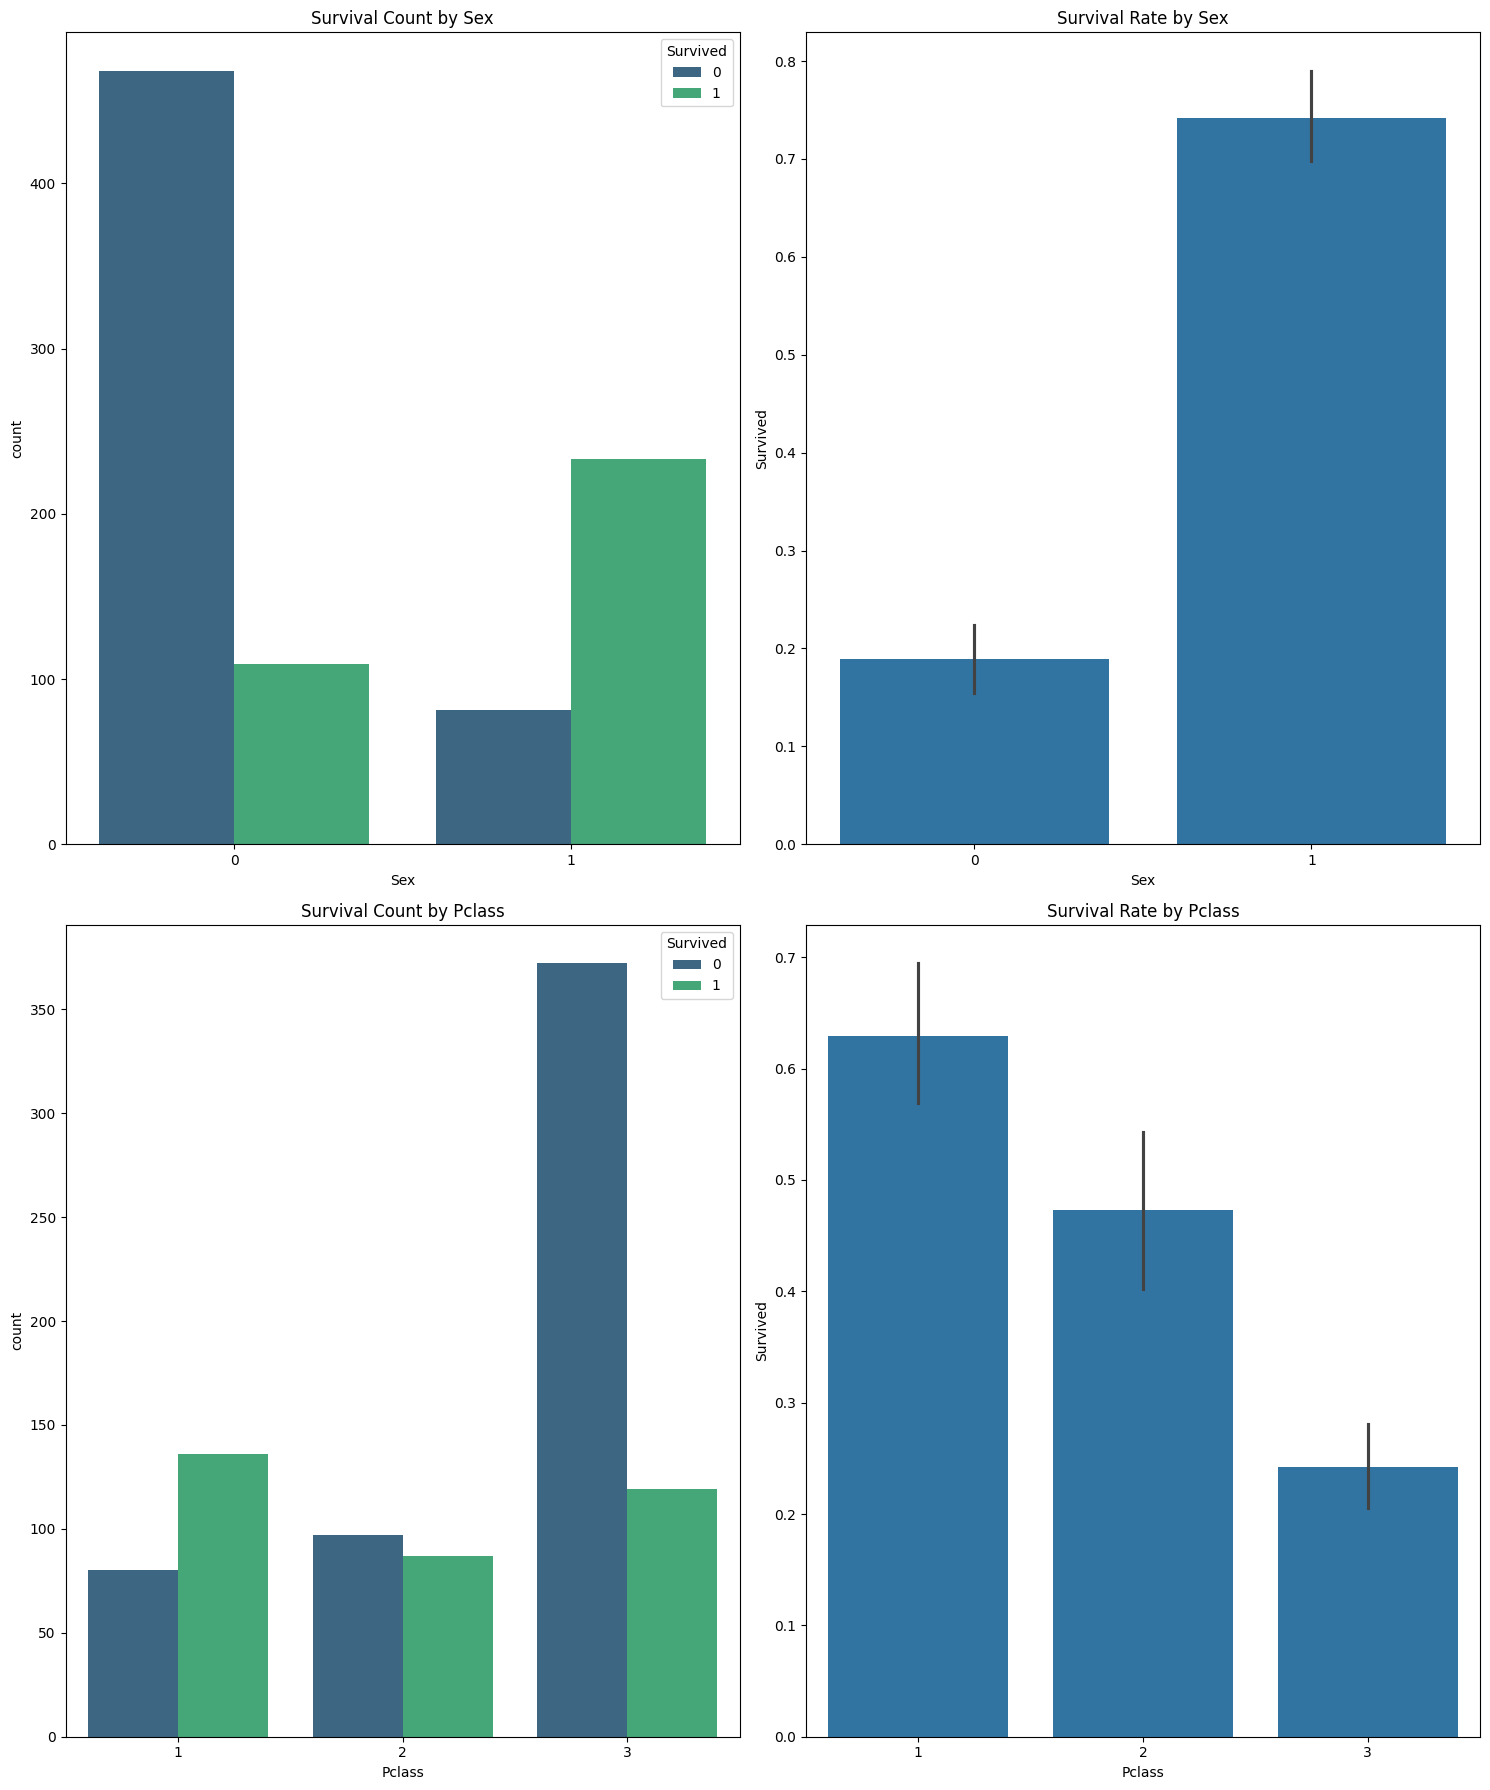

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the 3x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 18))

# 1. Survival Count by Sex
sns.countplot(x='Sex', hue='Survived', data=train, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Survival Count by Sex')

# 2. Survival Rate by Sex (Probability)
sns.barplot(x='Sex', y='Survived', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Sex')

# 3. Survival Count by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Survival Count by Pclass')

# 4. Survival Rate by Pclass (Probability)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Pclass')



plt.tight_layout()
plt.show()

## 9- Splitting the data

In [209]:
# Features (X) and Target (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# The test set doesn't have a 'Survived' column, so we just prepare X_test
X_test = test

# 10- Verify Preprocessing

In [210]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,familySize,isAlone,isChild,Port_C,Port_Q,Port_S
PassengerId,,,,,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,2,0,0,False,False,True
2,1,1,38.0,1,0,71.2833,1,2,0,0,True,False,False
3,3,1,26.0,0,0,7.9250,0,1,1,0,False,False,True
4,1,1,35.0,1,0,53.1000,1,2,0,0,False,False,True
5,3,0,35.0,0,0,8.0500,0,1,1,0,False,False,True


In [211]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,familySize,isAlone,isChild,Port_C,Port_Q,Port_S
PassengerId,,,,,,,,,,,,,
892,3,0,34.5,0,0,7.8292,0,1,1,0,False,True,False
893,3,1,47.0,1,0,7.0000,0,2,0,0,False,False,True
894,2,0,62.0,0,0,9.6875,0,1,1,0,False,True,False
895,3,0,27.0,0,0,8.6625,0,1,1,0,False,False,True
896,3,1,22.0,1,1,12.2875,0,3,0,0,False,False,True


# Classification Tree

## 1- Initialize and Fit the model

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
# max_depth=3 makes the tree easy to visualize and prevents overfitting
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model on the full training data
model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 2- 10-Fold cross validation

In [213]:
# Perform 10-fold cross-validation
# cv=10 specifies the number of folds
scores = cross_val_score(model, X, y, cv=10)

print(f"Scores for each fold: \n{scores}")
print(f"\nAverage Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Scores for each fold: 
[0.8        0.83146067 0.76404494 0.85393258 0.82022472 0.78651685
 0.78651685 0.78651685 0.84269663 0.83146067]

Average Accuracy: 0.8103
Standard Deviation: 0.0281


## 3- Visualize the tree

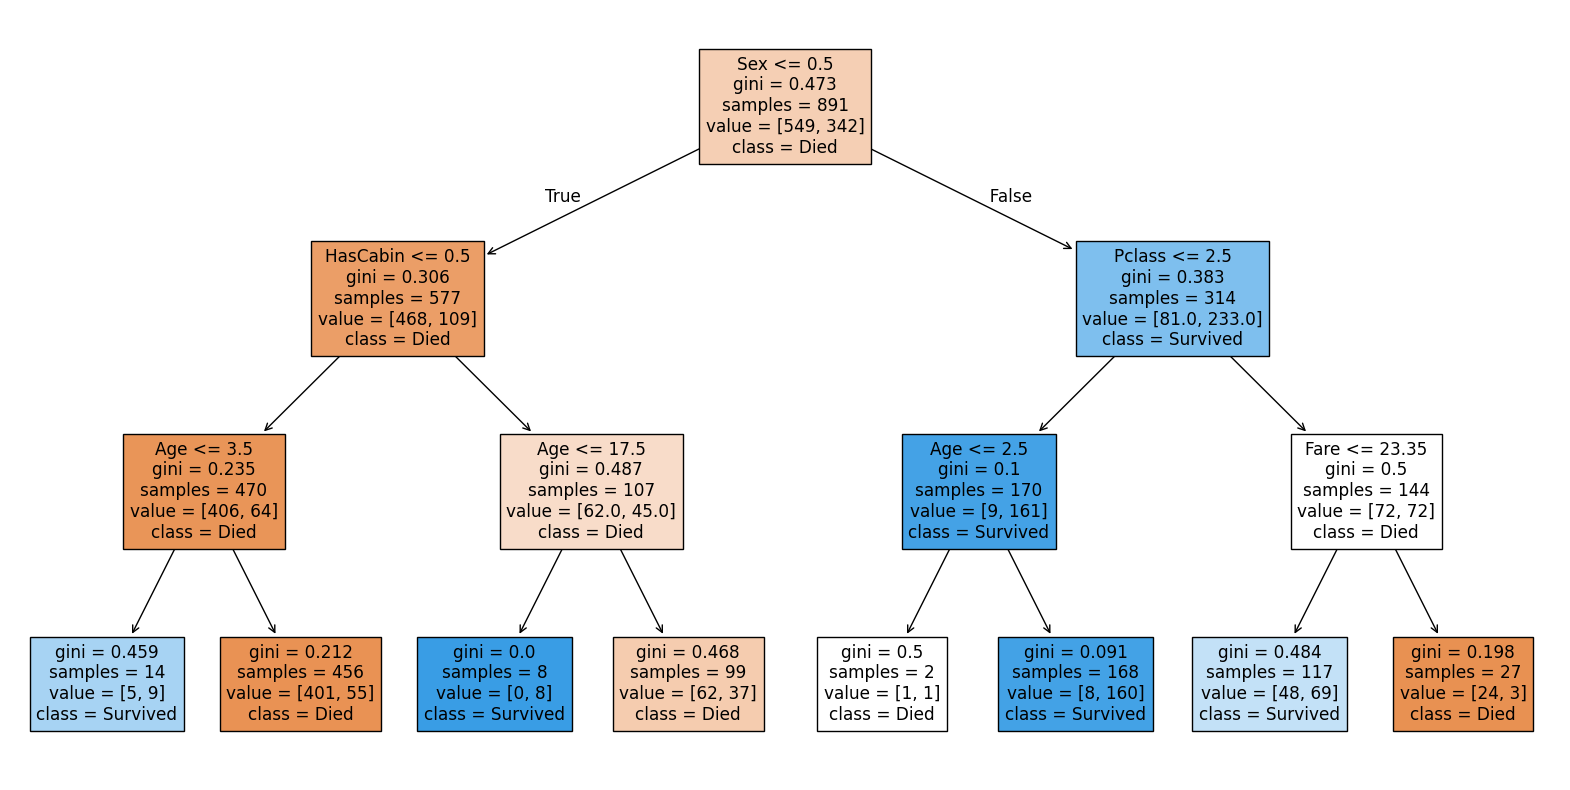

In [214]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()

# 4- Feature Importance

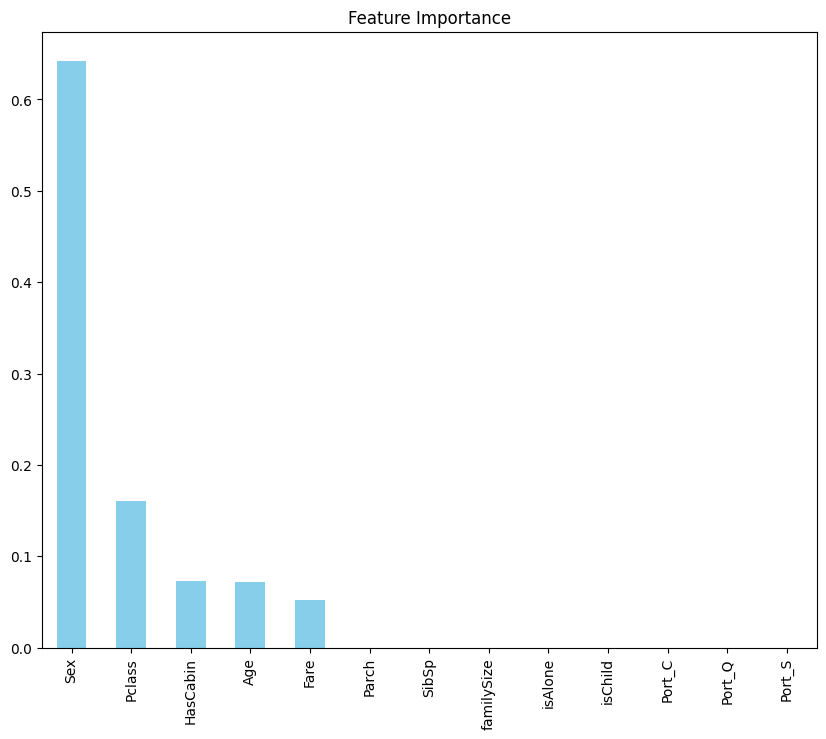

In [215]:
# See which features the tree actually used
import pandas as pd

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.show()

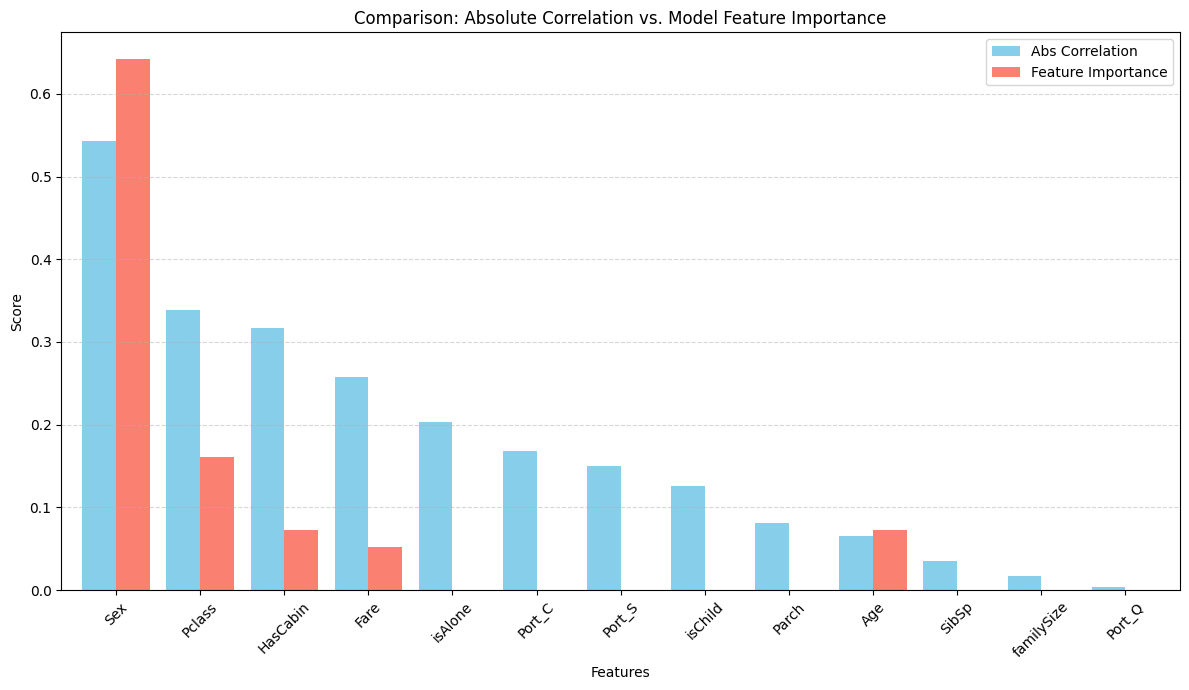

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepare Correlation Data (Absolute)
corr_series = abs(train.corr(numeric_only=True)['Survived']).drop('Survived')

# 2. Prepare Feature Importance Data
importance_series = pd.Series(model.feature_importances_, index=X.columns)

# 3. Merge into one DataFrame for side-by-side plotting
# This ensures only features present in both datasets are plotted together
comparison_df = pd.DataFrame({
    'Abs Correlation': corr_series,
    'Feature Importance': importance_series
}).sort_values(by='Abs Correlation', ascending=False)

# 4. Plot
comparison_df.plot(kind='bar', figsize=(12, 7), width=0.8, color=['skyblue', 'salmon'])

plt.title('Comparison: Absolute Correlation vs. Model Feature Importance')
plt.ylabel('Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

# 5- Stability Analysis

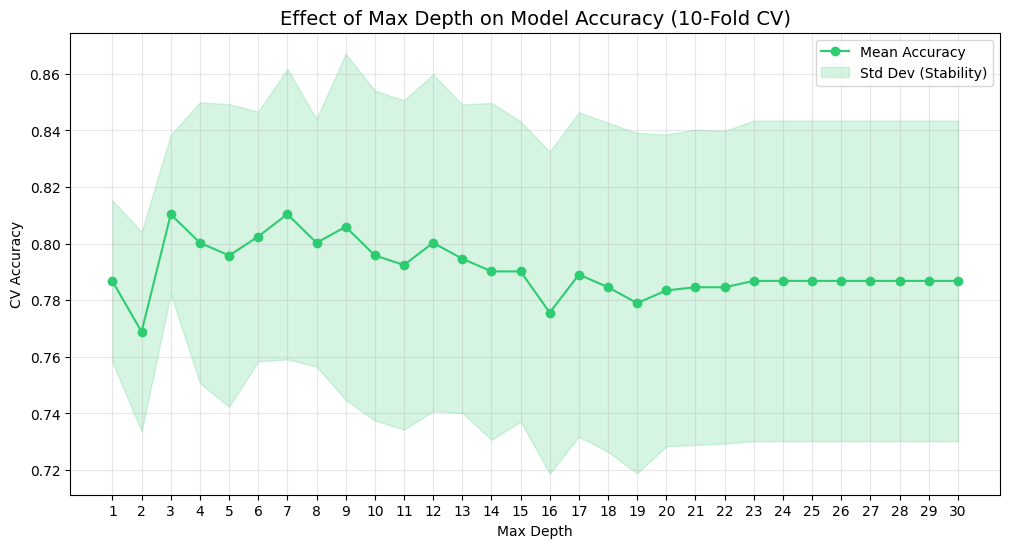

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

depths = range(1, 31)
mean_scores = []
std_scores = []

for d in depths:
    temp_model = DecisionTreeClassifier(max_depth=d, random_state=42)
    # Perform 10-fold CV
    scores = cross_val_score(temp_model, X, y, cv=10)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(depths, mean_scores, '-o', label='Mean Accuracy', color='#2ecc71')

# Fill the area between mean - std and mean + std to show stability
plt.fill_between(depths,
                 np.array(mean_scores) - np.array(std_scores),
                 np.array(mean_scores) + np.array(std_scores),
                 alpha=0.2, color='#2ecc71', label='Std Dev (Stability)')

plt.title('Effect of Max Depth on Model Accuracy (10-Fold CV)', fontsize=14)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.xticks(depths)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

at Max_Depth = 1 and 2, we see that the accuracy is rather low, as we are underfitting (not capturing enough information). But at Max_Depth = 4, we see a continous decreese in accuracy and an increase in std because we are overfitting the model (capturing specific details about the training set instead of the overlyning patterns). The optimal Max_Depth is 3.

# Make Predictions

In [218]:
test_ids = test.index # Extract the passenger IDs from the test set

# Make predictions
predictions = model.predict(X_test)

# Create the submission dataframe
# Note: Kaggle requires two columns: PassengerId and Survived
submission = pd.DataFrame({
    "PassengerId": test_ids, # Assuming you saved this from the original test set
    "Survived": predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
